### 在逻辑回归中使用多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:, 1]**2 < 1.5, dtype='int')

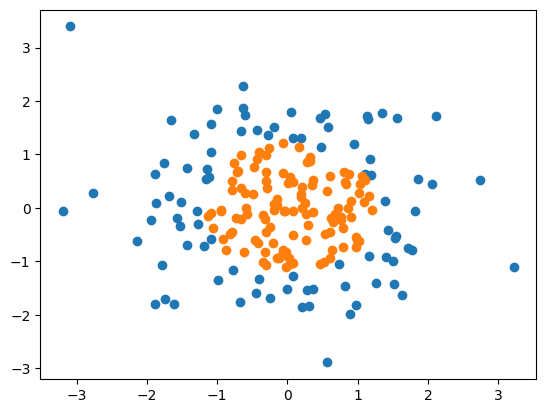

In [6]:
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.show()

### 使用逻辑回归

In [7]:
from LogisticRegression import LogisticRegression

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [9]:
log_reg.score(X, y)

0.605

In [10]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF0A0A', '#FFF59D', '#90CAD9'])
    
    plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)

C:\Users\wh\AppData\Local\Temp\ipykernel_5392\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


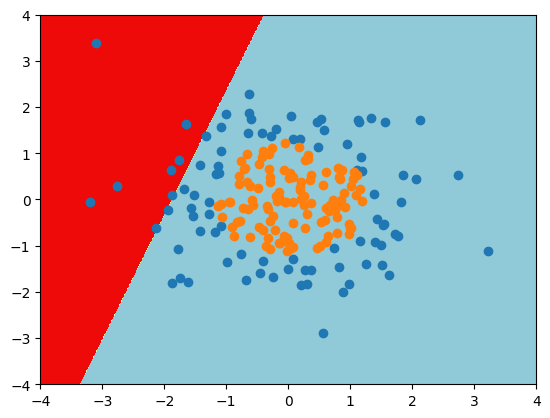

In [12]:
plot_decision_boundary(log_reg, axis=[-4 ,4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [35]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [36]:
poly_log_reg.score(X, y)

0.95

C:\Users\wh\AppData\Local\Temp\ipykernel_5392\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


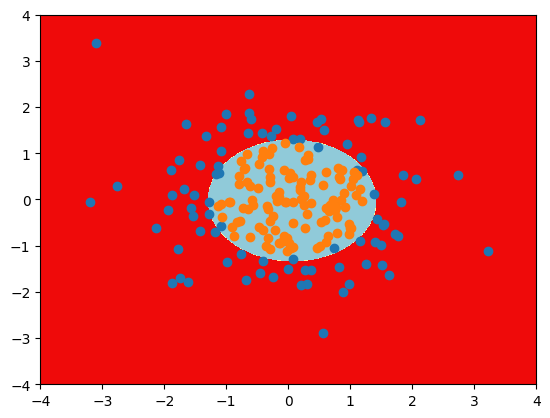

In [37]:
plot_decision_boundary(poly_log_reg, axis=[-4 ,4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.show()